In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('DND_Ironhack_UsedWatchesProject.csv',sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41430 entries, 0 to 41429
Data columns (total 13 columns):
Unnamed: 0        41430 non-null int64
website           41430 non-null object
offer_url         41430 non-null object
brand             41430 non-null object
title             41410 non-null object
price             40560 non-null float64
currency          41430 non-null object
reference_code    41430 non-null object
condition         39785 non-null object
watch_year        41430 non-null object
country           33159 non-null object
seller_name       8503 non-null object
date              41430 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 4.1+ MB


In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)

### Drop : 
- Rows without values prices
- Rows without values title
- Column seller_name and brand 

In [5]:
df.isna().sum()

website               0
offer_url             0
brand                 0
title                20
price               870
currency              0
reference_code        0
condition          1645
watch_year            0
country            8271
seller_name       32927
date                  0
dtype: int64

In [6]:
df.drop(columns='seller_name',inplace=True)

In [7]:
df.drop(columns='brand',inplace=True)

In [8]:
df.dropna(subset=['price'], how='all',inplace=True)

In [9]:
df.dropna(subset=['title'], how='all',inplace=True)

In [10]:
df.title.value_counts()

Omega                                                                                                                                553
Omega Seamaster                                                                                                                      276
Omega Constellation                                                                                                                  254
Omega Seamaster Diver 300 M                                                                                                          198
Omega Speedmaster Professional Moonwatch                                                                                             192
Omega Seamaster Aqua Terra                                                                                                           139
Omega Seamaster Planet Ocean                                                                                                         132
Omega Speedmaster                        

In [11]:
df.isna().sum()

website              0
offer_url            0
title                0
price                0
currency             0
reference_code       0
condition         1624
watch_year           0
country           8187
date                 0
dtype: int64

In [12]:
df.head()

,website,offer_url,title,price,currency,reference_code,condition,watch_year,country,date
2,watchshopping.com,https://www.watchshopping.com/seamaster-300-co...,Seamaster Automatic Men's Watch,5499.0,USD,234.10.39.20.01.001,A,2017,USA,2019-24-10
3,watchshopping.com,https://www.watchshopping.com/constellation-18...,Constellation,1889.0,USD,REF. NOT FOUND,AB,YR. NOT FOUND,USA,2019-24-10
4,watchshopping.com,https://www.watchshopping.com/omega-constellat...,Constellation,949.0,USD,REF. NOT FOUND,A,YR. NOT FOUND,USA,2019-24-10
5,watchshopping.com,https://www.watchshopping.com/omega-constellat...,Constellation,1079.0,USD,REF. NOT FOUND,A,YR. NOT FOUND,USA,2019-24-10
6,watchshopping.com,https://www.watchshopping.com/omega-constellat...,Constellation Quartz Ladies Watch,949.0,USD,REF. NOT FOUND,B,YR. NOT FOUND,USA,2019-24-10


### Check each websites quality 

In [13]:
df.website.value_counts()

chrono24.com                    14659
ebay.com                        12309
timepeaks.com                    6276
jd.com                           2375
1stdibs.com                      1225
mercadolivre.com.br              1102
crownandcaliber.com               646
watchfinder.co.uk                 559
watchmaster.com                   349
jomashop.com                      193
chronext.com                      121
thewatchbox.com                   103
chronoexpert.com                  102
zeitauktion.com                    87
shop.hodinkee.com                  87
watches-of-switzerland.co.uk       73
watch-heroes.com                   67
amazon.co.jp                       56
burdeens.com                       54
bucherer.com                       45
kame-kichi.com                     25
cresus.fr                          22
watchshopping.com                  10
interwatches.com                    9
therake.com                         4
Name: website, dtype: int64

In [14]:
df.describe().round(2)

,price
count,40558.00
mean,5159.31
std,19694.74
min,34.00
25%,1600.00
50%,2685.00
75%,4379.00
max,1505000.00


In [15]:
df.offer_url[df.website == 'ebay.com'].tolist()

['https://www.ebay.com/itm/Mens-Midsize-Omega-Seamaster-2252-50-Stainless-Steel-Automatic-36MM-Watch-/202822697983',
 'https://www.ebay.com/itm/Mens-Omega-Seamaster-2552-80-Stainless-Steel-Automatic-36MM-Watch-/202822691349',
 'https://www.ebay.com/itm/Mens-Omega-Seamaster-2541-80-Stainless-Steel-Date-Quartz-41MM-Watch-/202824171311',
 'https://www.ebay.com/itm/Mens-Omega-Seamaster-2551-80-Stainless-Steel-Automatic-36MM-Watch-/123972327823',
 'https://www.ebay.com/itm/Omega-Speedmaster-Professional-Moon-Watch-311-30-42-30-01-005-AD-Purchased-/174101475866',
 'https://www.ebay.com/itm/Mens-Omega-Seamaster-Chronograph-Chronometer-178-0514-Steel-Automatic-42MM-Watch-/174094343445',
 'https://www.ebay.com/itm/Omega-Seamaster-Railmaster-Steel-Auto-40mm-Bracelet-Mens-220-10-40-20-01-001-/283681370840',
 'https://www.ebay.com/itm/Omega-Speedmaster-Chronograph-Stainless-Steel-Automatic-Mens-Watch-3511-50-00-/153704258658',
 'https://www.ebay.com/itm/OMEGA-MENS-SPEEDMASTER-3521-80-AUTOMATIC-CHR

### Convert Currency in USD
- 2019-11-08 :  1 CNY = 0.141600 USD
- 24/10/2019	1 GBP =	1.2843 USD
- 11/08/2019	1 GBP =	1.2033 USD
- 24/10/2019	1 EUR =	1.1105 USD
- 11/08/2019	1 EUR =	1.1202 USD
- 11/08/2019	1 BRL =	0.2537 USD
- 11/08/2019	1 JPY =	0.0095 USD
- 11/08/2019 :  1 AUD = 0.678500 USD
- 24/10/2019	1 CHF =	1.0078 USD
- 11/08/2019	1 CHF =	1.0281 USD
- 1 CAD = 0.75689 USD
- 1 PLN = 0.25900 USD

In [16]:
df['currency_USD']=0
df['currency_USD'][df.currency == 'CNY']=df.price[df.currency == 'CNY'].apply(lambda x : x*0.141600).round(2)
df['currency_USD'][(df.currency == 'GBP')&(df.date == '2019-11-08')]=df.price[(df.currency == 'GBP')&(df.date == '2019-11-08')].apply(lambda x : x*1.2843).round(2)
df['currency_USD'][(df.currency == 'GBP')&(df.date != '2019-11-08')]=df.price[(df.currency == 'GBP')&(df.date != '2019-11-08')].apply(lambda x : x*1.2033).round(2)
df['currency_USD'][(df.currency == 'EUR')&(df.date == '2019-11-08')]=df.price[(df.currency == 'EUR')&(df.date == '2019-11-08')].apply(lambda x : x*1.1202).round(2)
df['currency_USD'][(df.currency == 'EUR')&(df.date != '2019-11-08')]=df.price[(df.currency == 'EUR')&(df.date != '2019-11-08')].apply(lambda x : x*1.1105).round(2)
df['currency_USD'][df.currency == 'BRL']=df.price[df.currency == 'BRL'].apply(lambda x : x*0.2537).round(2)
df['currency_USD'][df.currency == 'JPY']=df.price[df.currency == 'JPY'].apply(lambda x : x*0.0095).round(2)
df['currency_USD'][df.currency == 'AUD']=df.price[df.currency == 'AUD'].apply(lambda x : x*0.678500).round(2)
df['currency_USD'][(df.currency == 'CHF')&(df.date == '2019-11-08')]=df.price[(df.currency == 'CHF')&(df.date == '2019-11-08')].apply(lambda x : x*1.0281).round(2)
df['currency_USD'][(df.currency == 'CHF')&(df.date != '2019-11-08')]=df.price[(df.currency == 'CHF')&(df.date != '2019-11-08')].apply(lambda x : x*1.0078).round(2)
df['currency_USD'][df.currency == 'CAD']=df.price[df.currency == 'CAD'].apply(lambda x : x*0.75689).round(2)
df['currency_USD'][df.currency == 'PLN']=df.price[df.currency == 'PLN'].apply(lambda x : x*0.25900).round(2)
df['currency_USD'][df.currency == 'USD']=df.price[df.currency =='USD']

In [17]:
#df['currency_USD']=df.price[df.currency == 'CNY'].apply(lambda x : x*0.141600).round(2)

In [18]:
df[df.currency == 'USD']

,website,offer_url,title,price,currency,reference_code,condition,watch_year,country,date,currency_USD
2,watchshopping.com,https://www.watchshopping.com/seamaster-300-co...,Seamaster Automatic Men's Watch,5499.0,USD,234.10.39.20.01.001,A,2017,USA,2019-24-10,5499.0
3,watchshopping.com,https://www.watchshopping.com/constellation-18...,Constellation,1889.0,USD,REF. NOT FOUND,AB,YR. NOT FOUND,USA,2019-24-10,1889.0
4,watchshopping.com,https://www.watchshopping.com/omega-constellat...,Constellation,949.0,USD,REF. NOT FOUND,A,YR. NOT FOUND,USA,2019-24-10,949.0
5,watchshopping.com,https://www.watchshopping.com/omega-constellat...,Constellation,1079.0,USD,REF. NOT FOUND,A,YR. NOT FOUND,USA,2019-24-10,1079.0
6,watchshopping.com,https://www.watchshopping.com/omega-constellat...,Constellation Quartz Ladies Watch,949.0,USD,REF. NOT FOUND,B,YR. NOT FOUND,USA,2019-24-10,949.0
7,watchshopping.com,https://www.watchshopping.com/omega-constellat...,Omega Constellation Lady's Watch,609.0,USD,REF. NOT FOUND,A,YR. NOT FOUND,USA,2019-24-10,609.0
8,watchshopping.com,https://www.watchshopping.com/omega-speedmaste...,Speedmaster Automatic Men's Watch,1889.0,USD,REF. NOT FOUND,SA,YR. NOT FOUND,USA,2019-24-10,1889.0
9,watchshopping.com,https://www.watchshopping.com/planet-ocean-600...,Seamaster Automatic Ladies Watch,3159.0,USD,REF. NOT FOUND,A,2005,USA,2019-24-10,3159.0
10,watchshopping.com,https://www.watchshopping.com/seamaster-300-bl...,Seamaster Automatic Men's Watch,4109.0,USD,233.30.41.21.01.001,A,2014,USA,2019-24-10,4109.0
11,watchshopping.com,https://www.watchshopping.com/speedmaster-moon...,Speedmaster Manual-winding Men's Watch,3419.0,USD,311.30.42.30.01.006,SA,2014,USA,2019-24-10,3419.0


In [19]:
df.currency.value_counts()

USD    32913
CNY     2375
GBP     2072
EUR     1801
BRL     1102
AUD      109
JPY       89
CHF       54
CAD       42
PLN        1
Name: currency, dtype: int64

### Drop rows with : 
- Currency_USD < 250
- Currency_USD > 100 000

In [20]:
#df.drop(df[df.currency_USD < 250].index, inplace=True)

In [21]:
df.to_csv('Omega_watches1.csv')

### Classify in 5 categories 
- Constellation 
- De Ville
- SpeedMaster
- Seamaster
- Specialities
- Aqua Terra 
- Planet Ocean

In [22]:
df['title_copy']=df.title.copy()

In [23]:
df['Categories']=0
df['Categories'][df.title.str.contains('Specialites|Pocket Watch|pocket watch|Pocket watch|Museum',regex=True)]='Specialites'
df['Categories'][df.title.str.contains('Vintage|VINTAGE|vintage',regex=True)]='Vintage'
df['Categories'][df.title.str.contains('Constell|constell|CONSTELL|コンステレー|Globemaster|星座',regex=True)]='Constellation'
df['Categories'][df.title.str.contains('Seamaster|seamaster|SEAMASTER|シーマスタ|Railmaster|railmaster|RAILMASTER|レイルマスター|Planet Ocean|Aqua Terra',regex=True)]='Seamaster'
df['Categories'][df.title.str.contains('Speedmaster|speedmaster|SPEEDMASTER|Moonwatch|スピードマスター',regex=True)]='Speedmaster'
df['Categories'][df.title.str.contains('De Ville|de Ville|deville|Deville|de ville|DEVILLE|DE VILLE|デ・ビル|DeVille|De ville',regex=True)]='De Ville'


In [24]:
df.Categories.value_counts()

Seamaster        12695
Speedmaster       8783
0                 7483
Constellation     6642
De Ville          2638
Vintage           2153
Specialites        164
Name: Categories, dtype: int64

In [25]:
df[df.Categories == 'De Ville']

,website,offer_url,title,price,currency,reference_code,condition,watch_year,country,date,currency_USD,title_copy,Categories
147,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega DeVille Prestige Ladies Watch,2095.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,YR. NOT FOUND,UK,2019-24-10,2520.91,Pre-Owned Omega DeVille Prestige Ladies Watch,De Ville
149,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Ladymatic Co-Axial La...,3095.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,2015,UK,2019-24-10,3724.21,Pre-Owned Omega De Ville Ladymatic Co-Axial La...,De Ville
152,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Prestige Ladies Watch...,1295.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,2016,UK,2019-24-10,1558.27,Pre-Owned Omega De Ville Prestige Ladies Watch...,De Ville
153,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Prestige Mens Watch 4...,1795.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,2017,UK,2019-24-10,2159.92,Pre-Owned Omega De Ville Prestige Mens Watch 4...,De Ville
154,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Rattrapante Mens Watc...,4595.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,2007,UK,2019-24-10,5529.16,Pre-Owned Omega De Ville Rattrapante Mens Watc...,De Ville
155,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Trésor Mens Watch 432...,7495.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,2016,UK,2019-24-10,9018.73,Pre-Owned Omega De Ville Trésor Mens Watch 432...,De Ville
157,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Ladymatic Co-Axial La...,6995.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,2016,UK,2019-24-10,8417.08,Pre-Owned Omega De Ville Ladymatic Co-Axial La...,De Ville
158,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Prestige Ladies Watch...,2295.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,2015,UK,2019-24-10,2761.57,Pre-Owned Omega De Ville Prestige Ladies Watch...,De Ville
161,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Mens Watch 431.10.41....,3195.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,YR. NOT FOUND,UK,2019-24-10,3844.54,Pre-Owned Omega De Ville Mens Watch 431.10.41....,De Ville
166,watches-of-switzerland.co.uk,http://watches-of-switzerland.co.uk/Pre+Owned-...,Pre-Owned Omega De Ville Prestige Mens Watch 4...,1895.0,GBP,REF. NOT FOUND,- Some signs of previous wear may be present o...,2015,UK,2019-24-10,2280.25,Pre-Owned Omega De Ville Prestige Mens Watch 4...,De Ville


In [26]:
df[df.reference_code.str.contains(r'\b1\d\d.\d+')== True]

,website,offer_url,title,price,currency,reference_code,condition,watch_year,country,date,currency_USD,title_copy,Categories
26,chronext.com,http://chronext.com/fr/omega/speedmaster/145-0...,Omega,4200.0,EUR,145.022,Certified Pre-Owned - VIN...,1982,Germany,2019-24-10,4664.10,Omega,0
100,chronext.com,http://chronext.com/fr/omega/speedmaster/175-0...,Omega,2450.0,EUR,175.00.33,Certified Pre-Owned - VIN...,1998,Germany,2019-24-10,2720.72,Omega,0
119,chronext.com,http://chronext.com/fr/omega/seamaster/145-016...,Omega,6200.0,EUR,145.016,Certified Pre-Owned - VIN...,1970,Germany,2019-24-10,6885.10,Omega,0
458,watchfinder.co.uk,http://watchfinder.co.uk/Omega/Speedmaster Moo...,Speedmaster Moonwatch,8950.0,GBP,145.012,NaN,1967,UK,2019-24-10,10769.54,Speedmaster Moonwatch,Speedmaster
465,watchfinder.co.uk,http://watchfinder.co.uk/Omega/Seamaster Vinta...,Seamaster Vintage,2750.0,GBP,145.029,NaN,1969,UK,2019-24-10,3309.08,Seamaster Vintage,Seamaster
510,watchfinder.co.uk,http://watchfinder.co.uk/Omega/Constellation/1...,Constellation,1550.0,GBP,123.10.35.60.02.001,NaN,2015,UK,2019-24-10,1865.12,Constellation,Constellation
557,watchfinder.co.uk,http://watchfinder.co.uk/Omega/Speedmaster Moo...,Speedmaster Moonwatch,6250.0,GBP,145.022-69 ST,NaN,1969,UK,2019-24-10,7520.62,Speedmaster Moonwatch,Speedmaster
598,watchfinder.co.uk,http://watchfinder.co.uk/Omega/Speedmaster Red...,Speedmaster Reduced,2750.0,GBP,175.0032,NaN,1998,UK,2019-24-10,3309.08,Speedmaster Reduced,Speedmaster
721,watchfinder.co.uk,http://watchfinder.co.uk/Omega/Constellation G...,Constellation Globemaster,4250.0,GBP,130.33.39.21.03.001,NaN,2019,UK,2019-24-10,5114.03,Constellation Globemaster,Constellation
722,watchfinder.co.uk,http://watchfinder.co.uk/Omega/Constellation G...,Constellation Globemaster,3950.0,GBP,130.33.39.21.03.001,NaN,2017,UK,2019-24-10,4753.04,Constellation Globemaster,Constellation


In [27]:
df['Categories'][(df.Categories == 0)&(df.offer_url.str.contains('Constellation|constellation|CONSTELLATION|コンステレー|Globemaster|Constell|星座',regex=True))]='Constellation'
df['Categories'][(df.Categories == 0)&(df.offer_url.str.contains('Seamaster|seamaster|SEAMASTER|シーマスタ|Railmaster|RAILMASTER|レイルマスター|Planet-Ocean|aqua-terra|planet-ocean|Aqua-Terra|railmaster',regex=True))]='Seamaster'
df['Categories'][(df.Categories == 0)&(df.offer_url.str.contains('Speedmaster|speedmaster|SPEEDMASTER|Moonwatch|スピードマスター',regex=True))]='Speedmaster'
df['Categories'][(df.Categories == 0)&(df.offer_url.str.contains('Ville|deville|Deville||DEVILLE|VILLE|デ・ビル|DeVille|de-ville|PRESTIGE',regex=True))]='De Ville'

In [28]:
df.Categories.value_counts()

Seamaster        12926
De Ville          9652
Speedmaster       8942
Constellation     6721
Vintage           2153
Specialites        164
Name: Categories, dtype: int64

### Create sub_categories

In [29]:
df['Sub_Categories']=0

In [30]:
df['Sub_Categories'][(df.Categories=="Constellation")]='Constellation'
df['Sub_Categories'][(df.Categories=="Constellation")&(df.offer_url.str.contains('Globemaster|globemaster|GLOBEMASTER|130.\d+|130-\d+',regex=True))]='Globemaster'

In [31]:
df['Sub_Categories'][(df.Categories=="Seamaster")&(df.offer_url.str.contains('Diver|DIVER|diver|210.\d+|210-\d+',regex=True))]='Diver3000'
df['Sub_Categories'][(df.Categories=="Seamaster")&(df.offer_url.str.contains('Aqua-Terra|aqua-terra|AQUA-TERRA|Aqua-terra|aquaterra',regex=True))]='Aqua Terra'
df['Sub_Categories'][(df.Categories=="Seamaster")&(df.offer_url.str.contains('co-axial|CO-AXIAL|Co-Axial|Coaxial|coaxial|COAXIAL|233.\d+|233-\d+|234.\d+|234-\d+',regex=True))]='Co-axial300'
df['Sub_Categories'][(df.Categories=="Seamaster")&(df.offer_url.str.contains('Railmaster|railmaster|RAILMASTER',regex=True))]='Railmaster'
df['Sub_Categories'][(df.Categories=="Seamaster")&(df.offer_url.str.contains('1948|511.\d+|511-\d+',regex=True))]='Seamaster1948'
df['Sub_Categories'][(df.Categories=="Seamaster")&(df.offer_url.str.contains('BULLHEAD|bullhead|Bullhead|225.12\d+|225.12-\d+',regex=True))]='Bullhead'
df['Sub_Categories'][(df.Categories=="Seamaster")&(df.offer_url.str.contains('Ploprof|ploprof|PloProf|PLOPROF|224.\d+|224-\d+|227.\d+|227-\d+',regex=True))]='Ploprof'


In [32]:
df['Sub_Categories'][(df.Categories=="Speedmaster")&(df.offer_url.str.contains('Moon|moon|MOON|310.\d+|310-\d+|311.\d+|311-\d+|304.\d+|304-\d+',regex=True))]='MoonWatch'
df['Sub_Categories'][(df.Categories=="Speedmaster")&(df.offer_url.str.contains('331.\d+|331-\d+',regex=True))]='Speedmaster57'
df['Sub_Categories'][(df.Categories=="Speedmaster")&(df.offer_url.str.contains('mark-|MARK-|Mark-|327.\d+|327-\d+',regex=True))]='MARK II'
df['Sub_Categories'][(df.Categories=="Speedmaster")&(df.offer_url.str.contains('Racing|RACING|racing|329.\d+|329-\d+|326.\d+|326-\d+',regex=True))]='Racing'
df['Sub_Categories'][(df.Categories=="Speedmaster")&(df.offer_url.str.contains('324.\d+|324-\d+',regex=True))]='Speedmaster38'
df['Sub_Categories'][(df.Categories=="Speedmaster")&(df.offer_url.str.contains('HB-Sia|hb-Sia|HB-SIA|hb-sia|321.\d+|321-\d+',regex=True))]='HB-Sia Solar Impulse'
df['Sub_Categories'][(df.Categories=="Speedmaster")&(df.offer_url.str.contains('REGATTA|regatta|Regatta|318.\d+|318-\d+',regex=True))]='X-33 REGATTA/Skywalker'
df['Sub_Categories'][(df.Categories=="Speedmaster")&(df.offer_url.str.contains('Spacemaster|spacemaster|SPACEMASTER|325.\d+|325-\d+',regex=True))]='Spacemaster'


In [33]:
df['Sub_Categories'][(df.Categories=="De Ville")&(df.offer_url.str.contains('ladymatic|Ladymatic|LADYMATIC|425.\d+|425-\d+',regex=True))]='Ladymatic'
df['Sub_Categories'][(df.Categories=="De Ville")&(df.offer_url.str.contains('vision|Vision|VISION|433.\d+|433-\d+',regex=True))]='Our Vision'
df['Sub_Categories'][(df.Categories=="De Ville")&(df.offer_url.str.contains('TRESOR|Tresor|tresor|432.\d+|432-\d+|435.\d+|435-\d+|428.\d+|428-\d+',regex=True))]='Tresor'
df['Sub_Categories'][(df.Categories=="De Ville")&(df.offer_url.str.contains('Prestige|prestige|PRESTIGE|424.\d+|424-\d+|435.\d+|435-\d+|428.\d+|428-\d+',regex=True))]='Prestige'
df['Sub_Categories'][(df.Categories=="De Ville")&(df.offer_url.str.contains('Tourbillon|tourbillon|TOURBILLON|513.\d+|513-\d+|528.\d+|528-\d+',regex=True))]='Tourbillon'


In [34]:
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Constellation")]='Constellation'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Constellation")&(df.title.str.contains('Globemaster|globemaster|GLOBEMASTER|130.\d+|130-\d+',regex=True))]='Globemaster'

df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('Diver|DIVER|diver|210.\d+|210-\d+',regex=True))]='Diver3000'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('Aqua-Terra|aqua-terra|AQUA-TERRA|Aqua-terra|aquaterra',regex=True))]='Aqua Terra'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('co-axial|CO-AXIAL|Co-Axial|Coaxial|coaxial|COAXIAL|233.\d+|233-\d+|234.\d+|234-\d+',regex=True))]='Co-axial300'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('Railmaster|railmaster|RAILMASTER',regex=True))]='Railmaster'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('1948|511.\d+|511-\d+',regex=True))]='Seamaster1948'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('BULLHEAD|bullhead|Bullhead|225.12\d+|225.12-\d+',regex=True))]='Bullhead'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('Ploprof|ploprof|PloProf|PLOPROF|224.\d+|224-\d+|227.\d+|227-\d+',regex=True))]='Ploprof'

df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('Moon|moon|MOON|310.\d+|310-\d+|311.\d+|311-\d+|304.\d+|304-\d+',regex=True))]='MoonWatch'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('331.\d+|331-\d+',regex=True))]='Speedmaster57'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('mark-|MARK-|Mark-|327.\d+|327-\d+',regex=True))]='MARK II'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('Racing|RACING|racing|329.\d+|329-\d+|326.\d+|326-\d+',regex=True))]='Racing'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('324.\d+|324-\d+',regex=True))]='Speedmaster38'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('HB-Sia|hb-Sia|HB-SIA|hb-sia|321.\d+|321-\d+',regex=True))]='HB-Sia Solar Impulse'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('REGATTA|regatta|Regatta|318.\d+|318-\d+',regex=True))]='X-33 REGATTA/Skywalker'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('Spacemaster|spacemaster|SPACEMASTER|325.\d+|325-\d+',regex=True))]='Spacemaster'

df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.title.str.contains('ladymatic|Ladymatic|LADYMATIC|425.\d+|425-\d+',regex=True))]='Ladymatic'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.title.str.contains('vision|Vision|VISION|433.\d+|433-\d+',regex=True))]='Our Vision'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.title.str.contains('TRESOR|Tresor|tresor|432.\d+|432-\d+|435.\d+|435-\d+|428.\d+|428-\d+',regex=True))]='Tresor'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.title.str.contains('Prestige|prestige|PRESTIGE|424.\d+|424-\d+|435.\d+|435-\d+|428.\d+|428-\d+',regex=True))]='Prestige'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.title.str.contains('Tourbillon|tourbillon|TOURBILLON|513.\d+|513-\d+|528.\d+|528-\d+',regex=True))]='Tourbillon'


In [35]:
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Constellation")]='Constellation'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Constellation")&(df.title.str.contains('Globemaster|globemaster|GLOBEMASTER|130.\d+|130-\d+',regex=True))]='Globemaster'

df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('Aqua Terra|aqua terra|AQUA TERRA|Aqua terra|aquaterra',regex=True))]='Aqua Terra'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.title.str.contains('co axial|CO AXIAL|Co Axial|Coaxial|coaxial|COAXIAL|233.\d+|233-\d+|234.\d+|234-\d+',regex=True))]='Co-axial300'

df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('mark |MARK |Mark |327.\d+|327-\d+',regex=True))]='MARK II'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.title.str.contains('HB Sia|hb Sia|HB SIA|hb sia|321.\d+|321-\d+',regex=True))]='HB-Sia Solar Impulse'

In [36]:
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Constellation")]='Constellation'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Constellation")&(df.reference_code.str.contains('130.\d+|130-\d+',regex=True))]='Globemaster'

df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.reference_code.str.contains('210.\d+|210-\d+|212.\d+|212-\d+',regex=True))]='Diver3000'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.reference_code.str.contains('233.\d+|233-\d+|234.\d+|234-\d+',regex=True))]='Co-axial300'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.reference_code.str.contains('511.\d+|511-\d+',regex=True))]='Seamaster1948'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.reference_code.str.contains('225.12\d+|225.12-\d+',regex=True))]='Bullhead'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Seamaster")&(df.reference_code.str.contains('224.\d+|224-\d+|227.\d+|227-\d+',regex=True))]='Ploprof'

df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.reference_code.str.contains('310.\d+|310-\d+|311.\d+|311-\d+|304.\d+|304-\d+',regex=True))]='MoonWatch'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.reference_code.str.contains('331.\d+|331-\d+',regex=True))]='Speedmaster57'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.reference_code.str.contains('327.\d+|327-\d+',regex=True))]='MARK II'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.reference_code.str.contains('329.\d+|329-\d+|326.\d+|326-\d+',regex=True))]='Racing'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.reference_code.str.contains('324.\d+|324-\d+',regex=True))]='Speedmaster38'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.reference_code.str.contains('321.\d+|321-\d+',regex=True))]='HB-Sia Solar Impulse'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.reference_code.str.contains('318.\d+|318-\d+',regex=True))]='X-33 REGATTA/Skywalker'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="Speedmaster")&(df.reference_code.str.contains('325.\d+|325-\d+',regex=True))]='Spacemaster'

df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.reference_code.str.contains('425.\d+|425-\d+',regex=True))]='Ladymatic'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.reference_code.str.contains('433.\d+|433-\d+',regex=True))]='Our Vision'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.reference_code.str.contains('432.\d+|432-\d+|435.\d+|435-\d+|428.\d+|428-\d+',regex=True))]='Tresor'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.reference_code.str.contains('424.\d+|424-\d+|435.\d+|435-\d+|428.\d+|428-\d+',regex=True))]='Prestige'
df['Sub_Categories'][(df.Sub_Categories == 0)&(df.Categories=="De Ville")&(df.reference_code.str.contains('513.\d+|513-\d+|528.\d+|528-\d+',regex=True))]='Tourbillon'


In [37]:
df.watch_year.value_counts()

YR. NOT FOUND    28718
1970               780
2010               644
2018               435
1960               416
2017               380
2000               365
2015               321
2006               315
1998               303
2016               299
1969               279
2008               275
2007               273
2019               265
1950               261
2014               252
2012               243
2013               238
2005               237
1999               216
1968               201
2009               197
1966               187
2011               173
1995               165
1973               157
1972               155
1965               153
1967               149
                 ...  
1912                 6
1916                 6
1915                 5
1926                 5
1929                 5
1933                 4
1927                 4
1914                 4
1925                 4
1913                 3
1931                 3
1905                 3
1932       

In [38]:
df.Categories[df.Sub_Categories != 0].value_counts().sum()

17788

In [39]:
df.to_csv('Omega_tableau.csv')

## Dataviz

In [40]:
df.columns

Index(['website', 'offer_url', 'title', 'price', 'currency', 'reference_code',
       'condition', 'watch_year', 'country', 'date', 'currency_USD',
       'title_copy', 'Categories', 'Sub_Categories'],
      dtype='object')

In [41]:
df1=df.drop(df[df.currency_USD >8000].index)

Text(0.5, 1.0, 'Monthly Income Average per age categories')

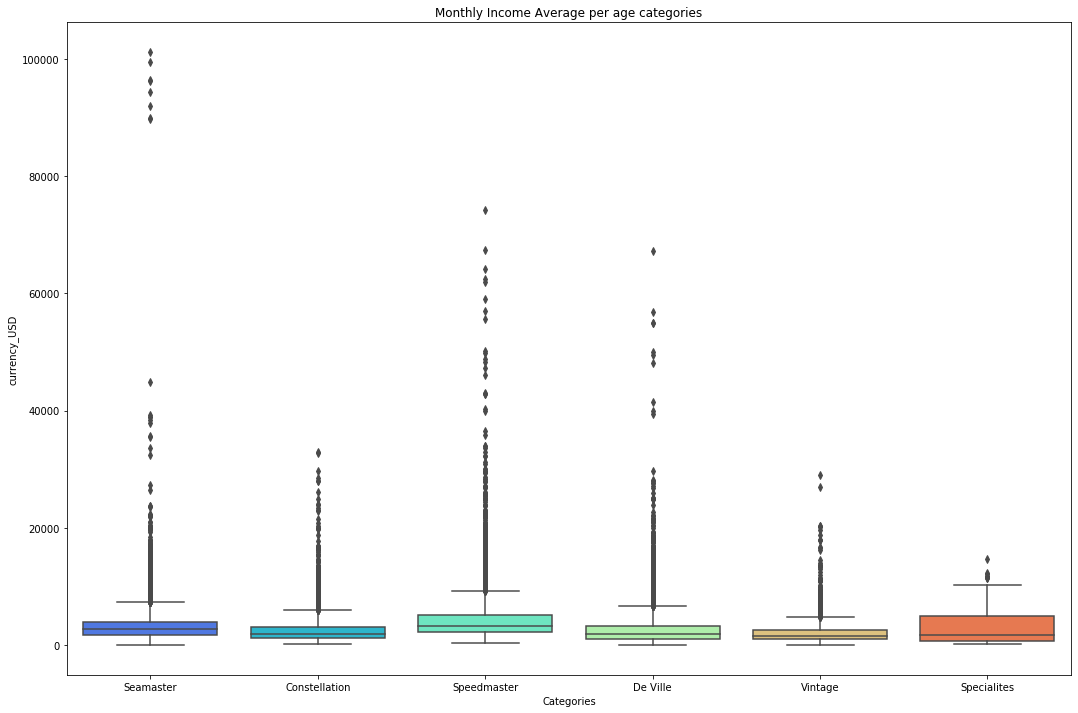

In [42]:
plt.subplots(figsize=(18, 12))
sns.boxplot(x='Categories',y='currency_USD',data=df,palette='rainbow')
plt.title('Monthly Income Average per age categories')

AttributeError: module 'seaborn' has no attribute 'plt'

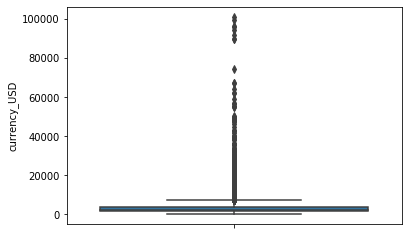

In [43]:
# Make boxplot for one group only
#sns.boxplot( y=df.currency_USD )
#sns.plt.show()

In [ ]:
df.columns

In [ ]:
plt.subplots(figsize=(18, 12))

sns.violinplot( y=df.currency_USD )